In [2]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null
!pip install rudalle==0.0.1rc7 > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.7.7 requires torch>=1.9.*, but you have torch 1.7.1+cu110 which is incompatible.
fairscale 0.4.6 requires torch>=1.8.0, but you have torch 1.7.1+cu110 which is incompatible.
allennlp 2.10.1 requires torch<1.13.0,>=1.10.0, but you have torch 1.7.1+cu110 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
google-api-core 1.33.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 3.19.4 which is incompatible.
gcsfs 2022.5.0 r

In [3]:
import numpy as np # linear algebra
import pandas as pd 
import os
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_clip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan, get_ruclip
from rudalle.utils import seed_everything

In [4]:
device = 'cuda'
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)

/opt/conda/lib/python3.7/site-packages/huggingface_hub/file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


In [5]:
realesrgan = get_realesrgan('x2', device=device)
tokenizer = get_tokenizer()
vae = get_vae(dwt=True).to(device)
ruclip, ruclip_processor = get_ruclip('ruclip-vit-base-patch32-v5')
ruclip = ruclip.to(device)

Downloading:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

x2 --> ready


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/276M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/748k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

ruclip --> ready


  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

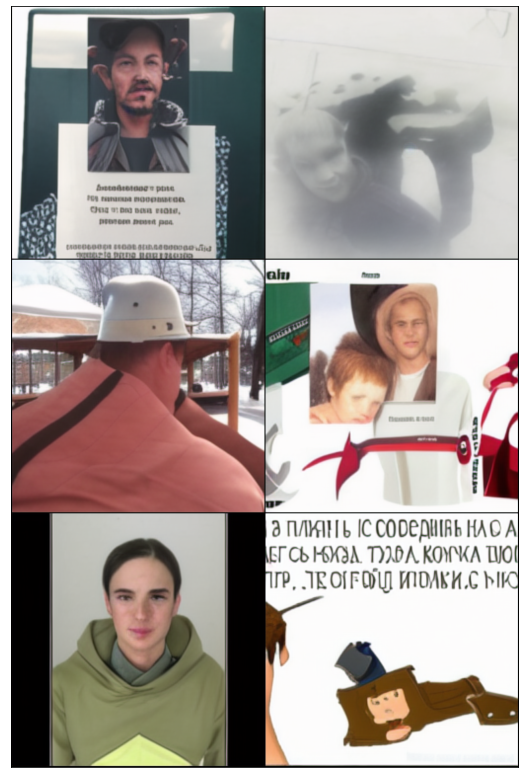

In [5]:
text = 'Незнакомец не был стар, но волосы у него были почти совершенно белыми. Под плащом он носил потертую кожаную куртку со шнуровкой у горла и на рукавах.'
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

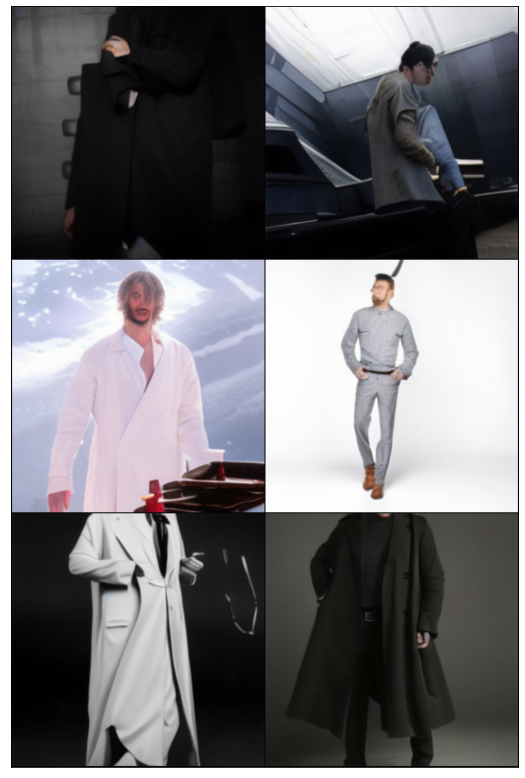

In [6]:
text = 'Мужчина с белыми волосами в плаще.'
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

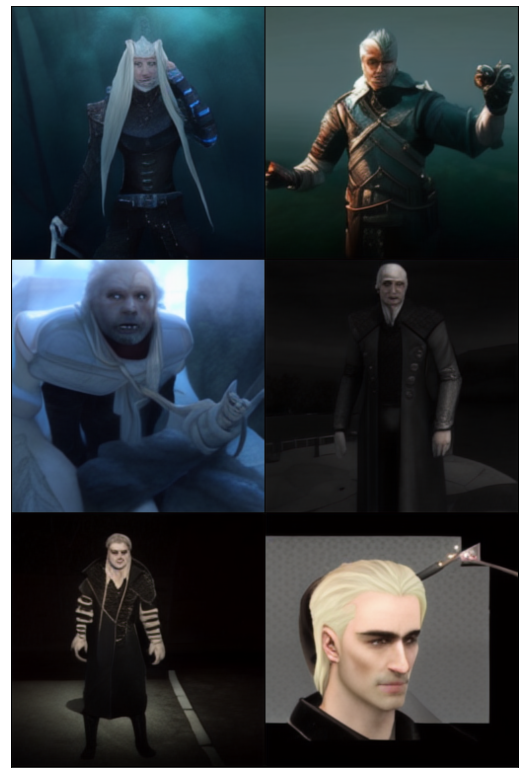

In [7]:
text = 'ведьмак с белыми волосами в черном плаще' 
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

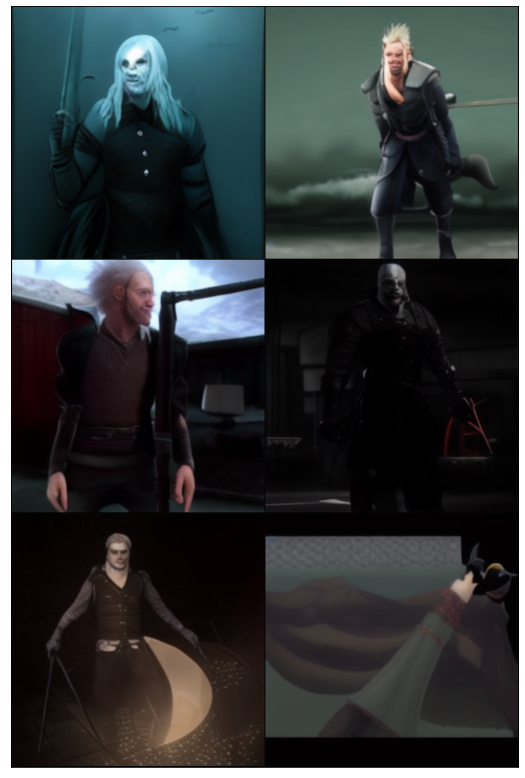

In [8]:
text = 'ведьмак с белыми волосами в черном плаще с мечом' 
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

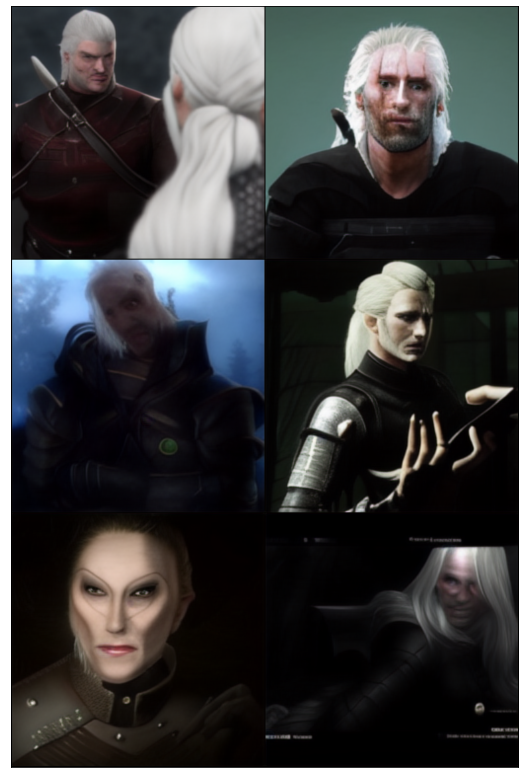

In [11]:
text = 'ведьмак с белыми волосами, шрамом на лице, в черном плаще с мечом' 
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

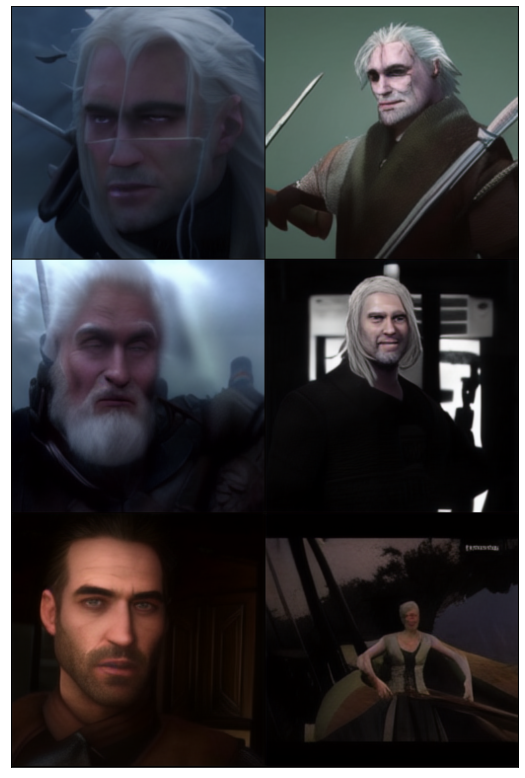

In [6]:
text = 'Геральт - ведьмак с белыми волосами, шрамом на лице, в черном плаще с мечом' 
scores = []
pil_images = []

seed_everything(6955)

for top_k, top_p, images_num in [
    (1024, 0.98, 3),
    (512, 0.97, 3), 
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores
show(pil_images,2)